### 5. Using the k-mer detection program in Q-4 above, carry out comparison of the SARS-CoV-2 genome with bat coronavirus genome using k=6 (exact matches). (i) Based on your analysis can you infer that SARS-CoV-2 coronavirus is related to bat coronavirus? (ii) Based on the GC content of SARS-CoV-2 genome, what can you say about the stability of this virus at high temperatures.

In [2]:
import collections
import itertools
import math
import numpy as np
import heapq

In [3]:
def count_kmers(seq, k = 6):
    counts = collections.defaultdict(lambda: 0)
    num_kmers = len(seq) - k + 1
    for i in range(num_kmers):
        kmer = seq[i:i+k]
        if kmer not in counts:
            counts[kmer] = 0
        counts[kmer] += 1
#     counts = dict(sorted(counts.items(), key=lambda item: item[1]))
#     counts = dict(collections.OrderedDict(reversed(list(counts.items()))))
#     counts = dict(itertools.islice(counts.items(), 50))
    return counts

def reverse_complement(seq):
    return seq.replace('A', 't').replace('T', 'a').replace('G', 'c').replace('C', 'g').upper()[::-1]

def merge(dict1, dict2):
    for item in dict2:
        dict1[item] += dict2[item]
    return dict1

with open('sars-cov-2.txt', 'r') as file:
    cov = file.read().replace('\n', '')
with open('bat-cov.txt', 'r') as file:
    bat = file.read().replace('\n', '')

dict_1 = count_kmers(cov)
dict_1_rev_comp = count_kmers(reverse_complement(cov))
dict_2 = count_kmers(bat)
dict_2_rev_comp = count_kmers(reverse_complement(bat))

In [4]:
m1 = merge(dict_1, dict_1_rev_comp)
m2 = merge(dict_2, dict_2_rev_comp)
common_seq = 0
for item in m1:
    common_seq += min(m1[item], m2[item])
total_cov_seq = sum(m1[x] for x in m1)
total_bat_seq = sum(m2[x] for x in m2)
print("Common k-mer sequences: ", common_seq, "\nTotal SARS-CoV-2 k-mer sequences: ", total_cov_seq, "\nTotal Bat-CoV k-mer sequences: ", total_bat_seq)
print("\nBased on this, we can infer that SARS-CoV-2 and Bat-CoV are in fact related to a high extent and that they have a similar ORI.")

Common k-mer sequences:  49952 
Total SARS-CoV-2 k-mer sequences:  59796 
Total Bat-CoV k-mer sequences:  59274

Based on this, we can infer that SARS-CoV-2 and Bat-CoV are in fact related to a high extent and that they have a similar ORI.


SARS-CoV-2 GC content:
37.97275434243176 %


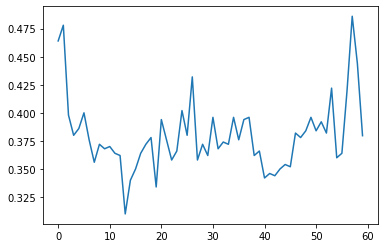

In [8]:
n = math.ceil(len(cov) / 500)
a = np.zeros(n)
sets_of_500 = [[] for x in range(n)]
for i in range(len(cov)):
    index = math.floor(i / 500)
    sets_of_500[index].append(cov[i])

i = 0
for sample in sets_of_500:
    G = sample.count('G')
    C = sample.count('C')
    A = sample.count('A')
    T = sample.count('T')
    a[i] = (G + C) / (A + T + G + C)
    i = i + 1
import matplotlib.pyplot as plt
print("SARS-CoV-2 GC content:")
plt.plot(a)
from statistics import mean
ans = mean(a)
print(ans * 100, "%")

In [6]:
print("\nSince the GC content is less than 50% in general and even reaches 35% at some points, we can say that the virus is unlikely to be stable at high temperatures.")


Since the GC content is less than 50% in general and even reaches 35% at some points, we can say that the virus is unlikely to be stable at high temperatures.
